In [293]:
# Import library
# Library for preprocessing data
import pandas as pd
import numpy as np

# Library for visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt


# Classification

In [294]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [295]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [296]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [297]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [298]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [299]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [300]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [301]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [302]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

print("Accuracy: {0}".format(knn.score(x_test, y_test)))


Accuracy: 0.9666666666666667


In [303]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over
for i, k in enumerate(neighbors):
    
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train, y_train)

  test_accuracy[i] = knn.score(x_test, y_test)

  train_accuracy[i] = knn.score(x_train, y_train)

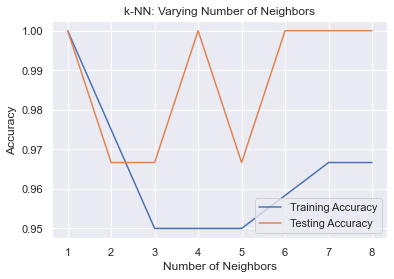

In [304]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [305]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [306]:
X = iris_df.iloc[:,0:4].values
y = iris_df.iloc[:,4].values

In [307]:
print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0. 0. 0. 0. 0.]


In [308]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [309]:
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [310]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [312]:
print(X_train[0:5])


[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]


In [313]:
print(y_train[0:5])


[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]]


In [314]:
print(X_test[0:5])


[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]


In [315]:
print(y_test[0:5])


[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


In [316]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model

In [317]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [318]:
model.fit(X_train, y_train, batch_size=50, epochs=100)


Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 2.0907 - accuracy: 0.3667
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 1.8460 - accuracy: 0.3667
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 1.6844 - accuracy: 0.3667
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 1.5574 - accuracy: 0.3667
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 1.4469 - accuracy: 0.3667
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 1.3519 - accuracy: 0.3667
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 1.2637 - accuracy: 0.3667
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 1.1912 - accuracy: 0.3667
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 1.1210 - accuracy: 0.3667
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0632 - accuracy: 0.3667
Epoch 11/100
3/3 [===========

In [319]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.36736252903938293
Test accuracy: 0.9333333373069763


In [320]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

Train loss: 0.329245924949646
Train accuracy: 0.949999988079071


# Recommendation Systems

In [533]:
movies = pd.read_csv('./movies.csv', encoding='latin-1')
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
95,96,In the Bleak Midwinter (1995),Comedy
96,97,Hate (Haine,NaN
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [534]:
movies.genres = movies.genres.str.split('|')

In [544]:
movies.genres.tolist()

[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', "Children's"],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 nan,
 ['Comedy', 'Horror'],
 ['Animation', "Children's"],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Thriller'],
 ['Comedy'],
 ['Action'],
 ['Action', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Romance'],
 nan,
 ['Drama'],
 ['Drama'],
 ['Drama', 'Sci-Fi'],
 ['Adventure', 'Romance'],
 ["Children's", 'Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Documentary'],
 ['Comedy'],
 ['Comedy', 'Romance'],
 nan,
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Drama'],
 ['Action', 'Adventure'],
 ['Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Crime', 'Thrill

In [548]:
a = []
for i in movies['genres'].tolist():
  for j in range(list(i)):
    a.append(j)

TypeError: 'list' object cannot be interpreted as an integer

In [543]:
genre_columns = list(set([j for i in movies['genres'].tolist() for j in i]))

TypeError: 'float' object is not iterable